# I - Chargement des packages

In [1]:
# Importation des packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

from Description import *

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA


In [2]:
print('Version des librairies utilisées :') 
!python --version
print('Pandas',pd.__version__)
print('NumPy',np.version.full_version)
print('Matplotlib',mpl.__version__)
print('Seaborn',sb.__version__)
print('Sklearn',sklearn.__version__)

Version des librairies utilisées :
Python 3.9.16
Pandas 1.5.3
NumPy 1.23.5
Matplotlib 3.7.0
Seaborn 0.12.2
Sklearn 1.2.1


# II - Chargement du jeu de données

In [3]:
# Importation du jeu de données
data = pd.read_csv('/Users/Leila/Documents/OpenClassRooms/P3/Selectdatafood.csv', sep=',',na_values=['NaT','nan'],low_memory=False)
datafood = data.copy()
pd.options.display.max_columns = None
datafood.drop(['Unnamed: 0'], axis = 1, inplace = True)
datafood.head()

,product_name,brands,countries_fr,serving_size,nutrition_grade_fr,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,Banana Chips Sweetened (Whole),NaN,États-Unis,28 g (1 ONZ),d,2243.0,28.57,28.570000,64.29,14.29,3.57,0.00000
1,Peanuts,Torn & Glasser,États-Unis,28 g (0.25 cup),b,1941.0,17.86,0.000000,60.71,17.86,17.86,0.63500
2,Organic Salted Nut Mix,Grizzlies,États-Unis,28 g (0.25 cup),d,2540.0,57.14,5.360000,17.86,3.57,17.86,1.22428
3,Organic Polenta,Bob's Red Mill,États-Unis,35 g (0.25 cup),NaN,1552.0,1.43,5.069588,77.14,5.65,8.57,0.00000
4,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,52 g (0.5 cup),NaN,1933.0,18.27,1.920000,63.46,11.54,13.46,0.00000


In [4]:
Selectdatafood=datafood.iloc[:,[5,6,7,8,9,10,11]]
Selectdatafood.head()

,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,2243.0,28.57,28.570000,64.29,14.29,3.57,0.00000
1,1941.0,17.86,0.000000,60.71,17.86,17.86,0.63500
2,2540.0,57.14,5.360000,17.86,3.57,17.86,1.22428
3,1552.0,1.43,5.069588,77.14,5.65,8.57,0.00000
4,1933.0,18.27,1.920000,63.46,11.54,13.46,0.00000


# III - Structure du jeu de données

In [5]:
Jeudedonnée(Selectdatafood)


            Structure du jeu de données 

Nombre d observations        :  251282
Nombre de variables          :  7
Nombre de valeurs manquantes :  0
Taux de valeurs manquantes   :  0.0 %
Nombre de valeurs dupliquées :  72668
Taux de valeurs dupliquées   :  4.13 %


Nombre de types de variable :
float64    7
dtype: int64 



<Axes: >

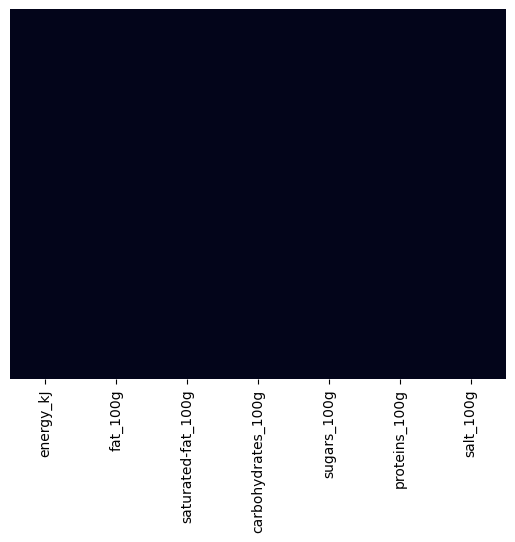

In [6]:
sb.heatmap(Selectdatafood.isnull(), yticklabels=False, cbar=False )

# IV. Analyse exploratoire

## 1 - Analyses univariées (variables quantitatives)

### A) Distribution de l'énergie en kiloJoules

<Axes: xlabel='energy_kJ', ylabel='Count'>

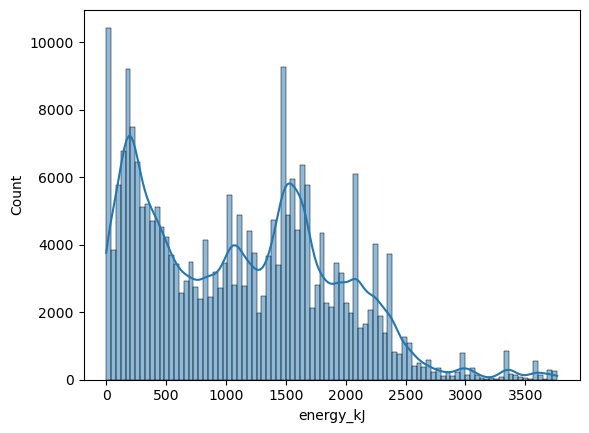

In [7]:
sb.histplot(Selectdatafood["energy_kJ"], kde=True)

### B) Distributions des valeurs nutritionnelles

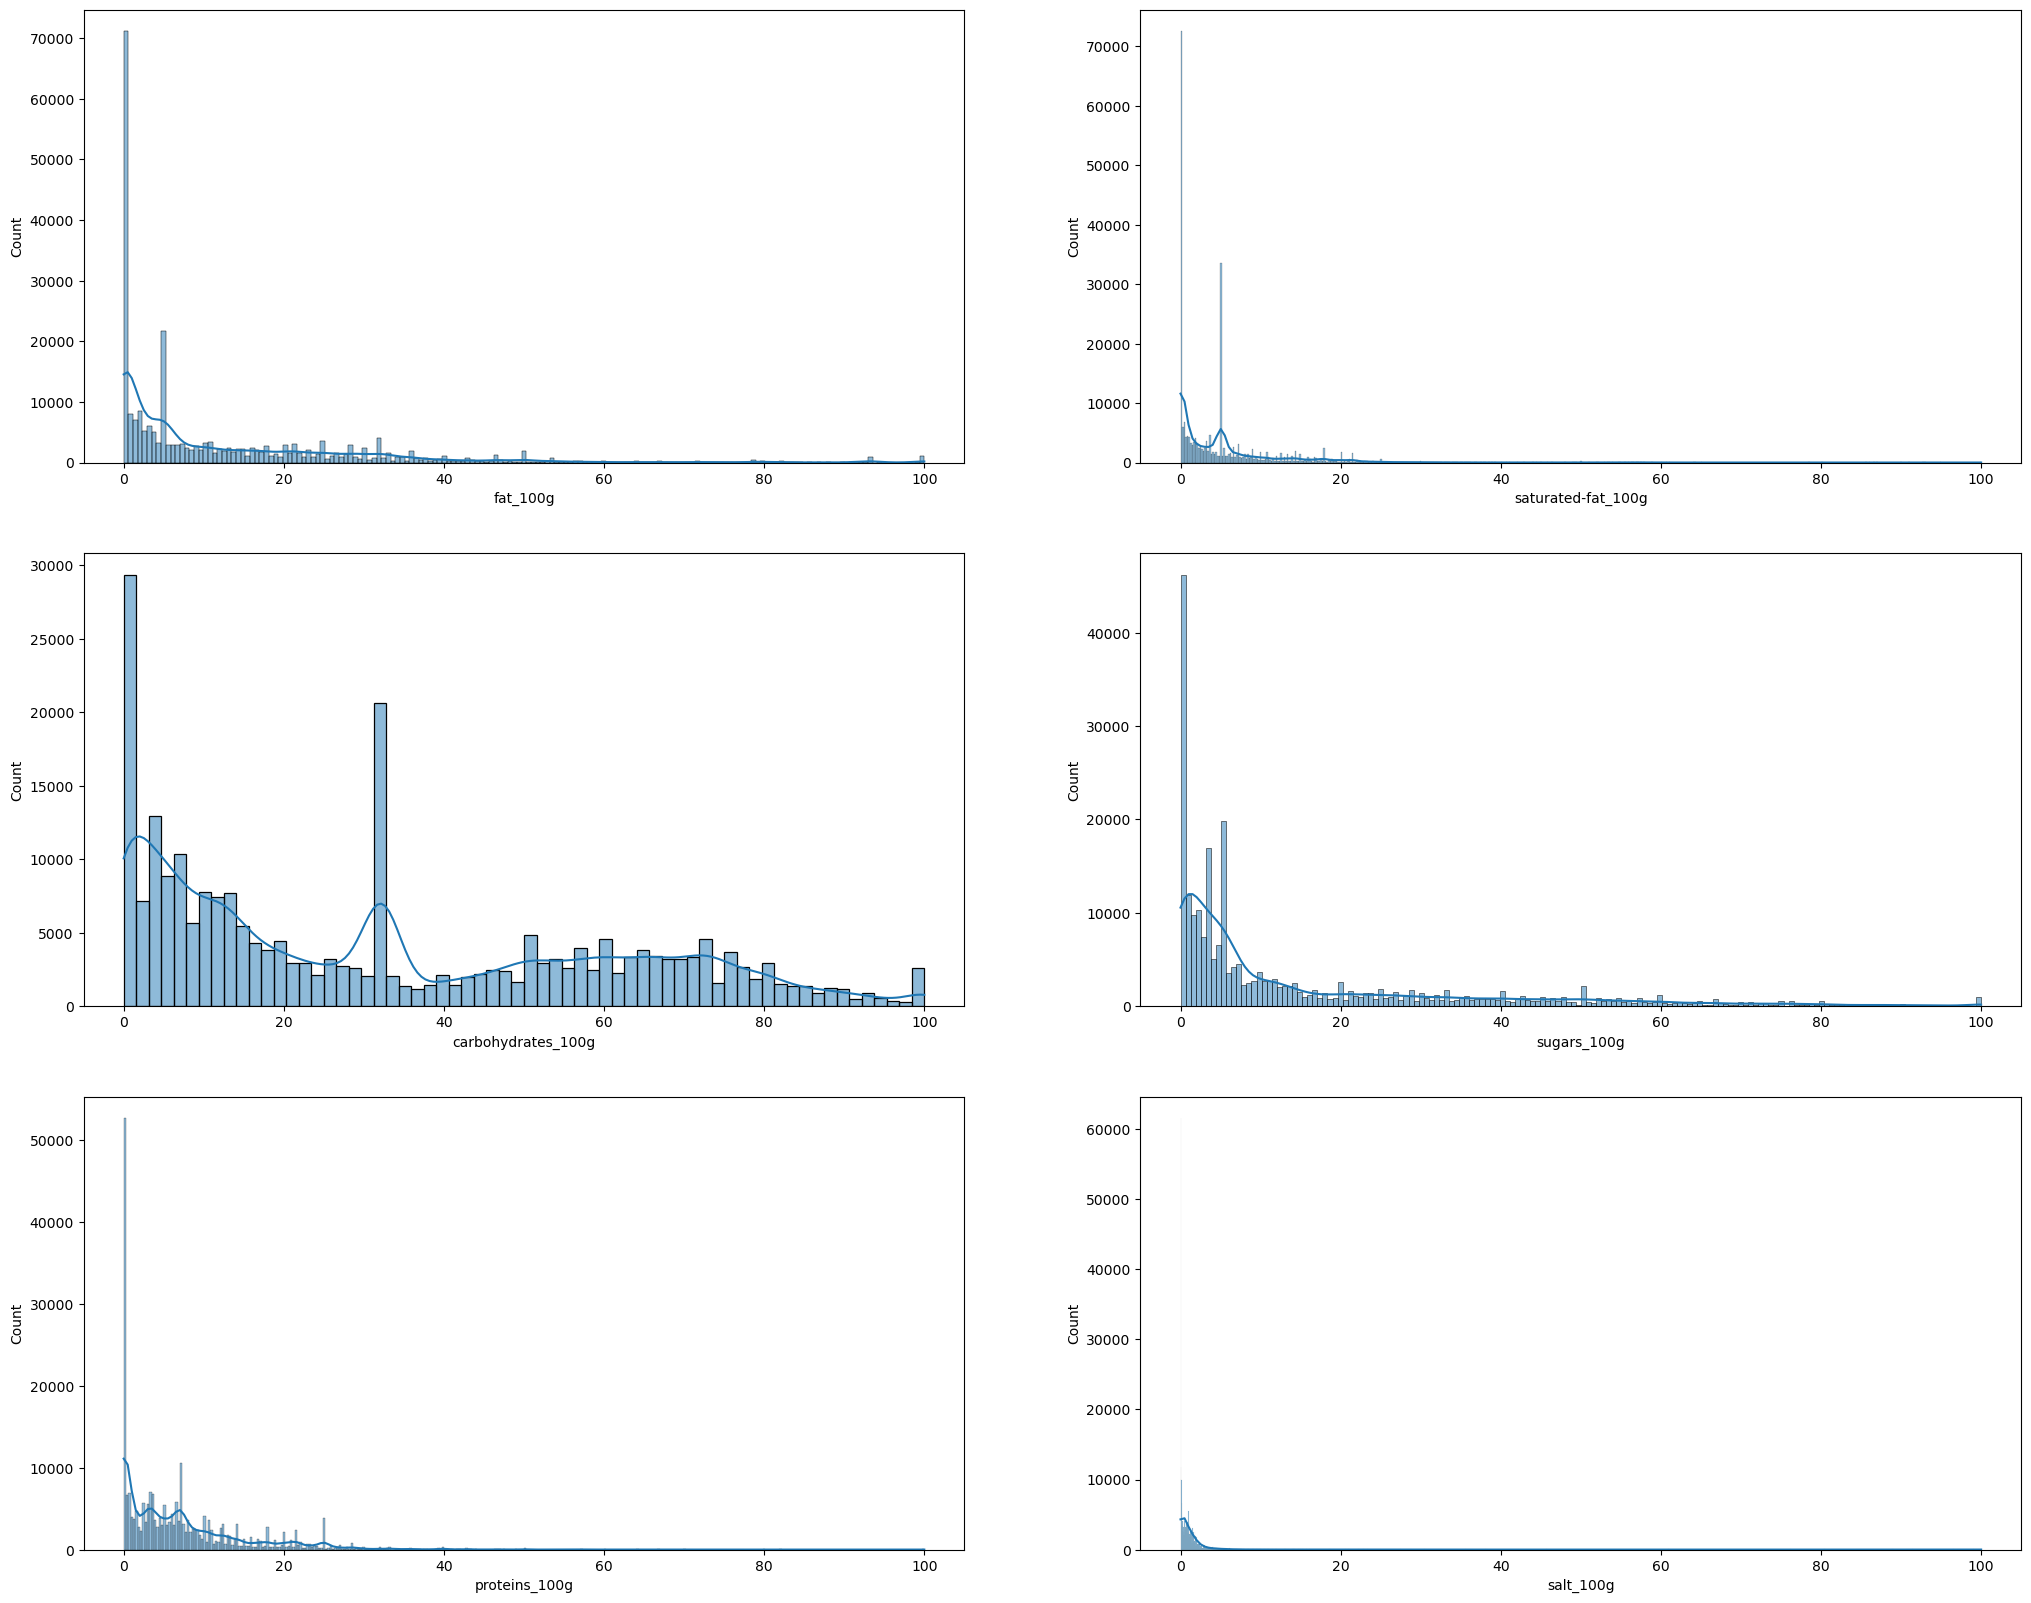

In [8]:

fig, axs = plt.subplots(3, 2, figsize=(25, 20))

sb.histplot(Selectdatafood["fat_100g"], kde=True,  ax=axs[0, 0])
sb.histplot(Selectdatafood["saturated-fat_100g"], kde=True,  ax=axs[0, 1])
sb.histplot(Selectdatafood["carbohydrates_100g"], kde=True,  ax=axs[1, 0])
sb.histplot(Selectdatafood["sugars_100g"], kde=True,  ax=axs[1, 1])
sb.histplot(Selectdatafood["proteins_100g"], kde=True,  ax=axs[2, 0])
sb.histplot(Selectdatafood["salt_100g"], kde=True,  ax=axs[2, 1])

plt.show()

### C) Statistiques descriptives des valeurs nutritionnelles 

In [9]:
Selectdatafood.describe()

,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
count,251282.000000,251282.000000,251282.000000,251282.000000,251282.000000,251282.000000,251282.000000
mean,1121.429156,12.028380,5.068533,32.228796,15.213601,7.112611,1.551496
std,785.640422,16.568868,7.269867,27.986291,20.491827,8.097474,6.156840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,385.000000,0.100000,0.000000,6.670000,1.600000,0.770000,0.045720
50%,1100.000000,5.000000,3.000000,26.060000,5.650000,5.000000,0.543560
75%,1674.000000,18.580000,6.250000,56.670000,21.670000,10.000000,1.353820
max,3766.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## 2 - Analyses bivariées

### A) Visualisation d 'un graphique global de relations entre l'ensemble des variables

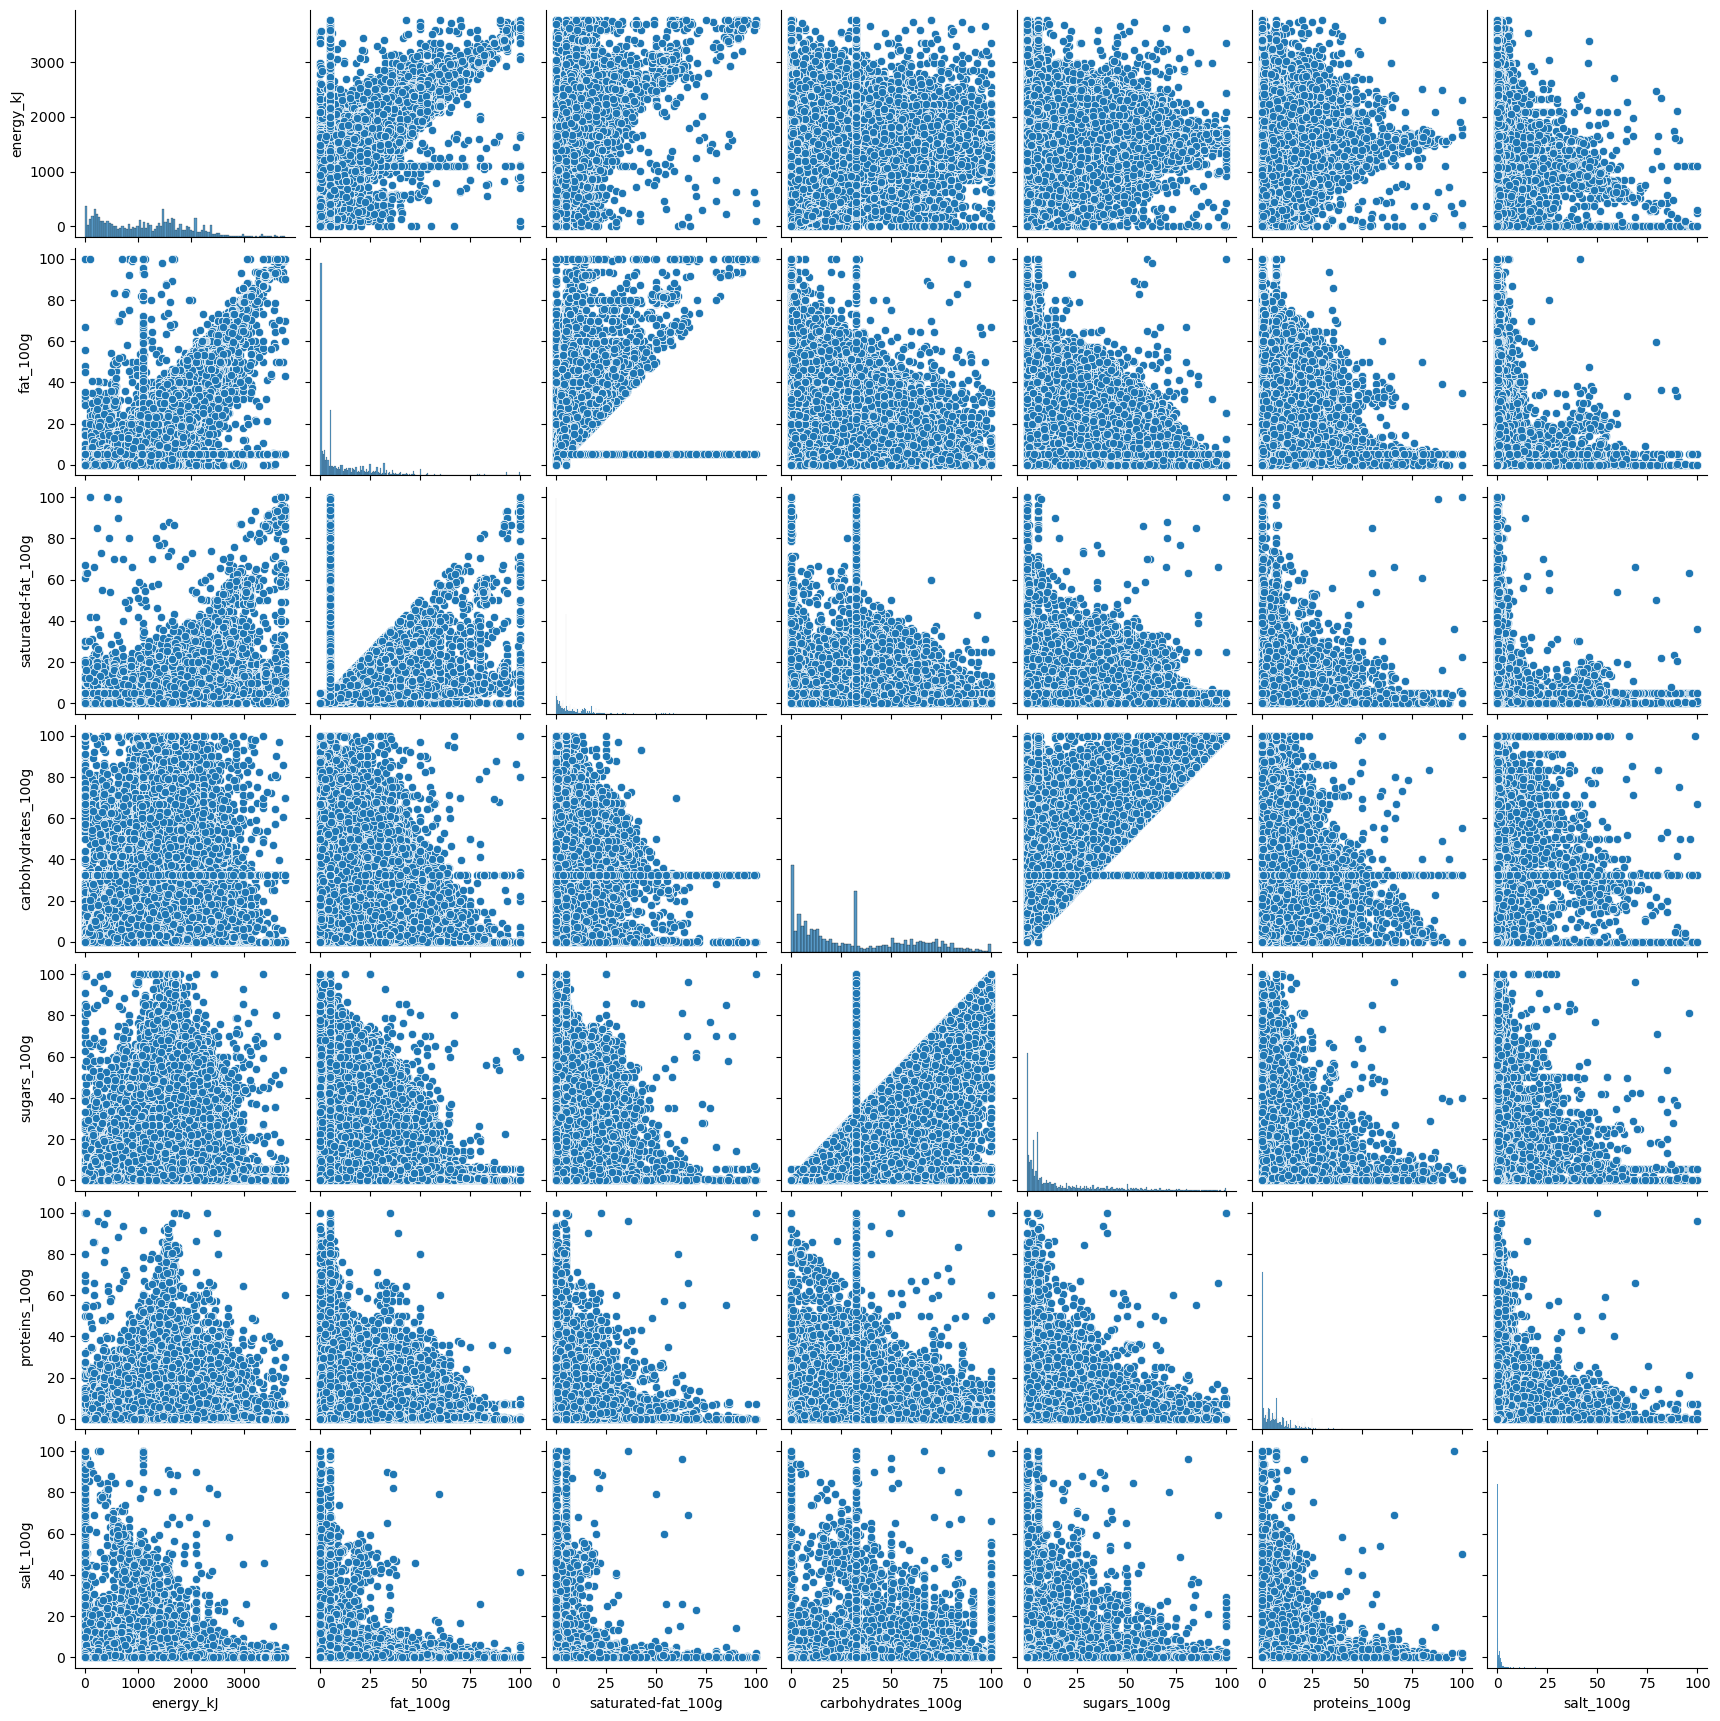

In [10]:
sb.pairplot(data=Selectdatafood)

### B) Analyse des corrélations linéaires  entre les variables quantitatives

<Axes: >

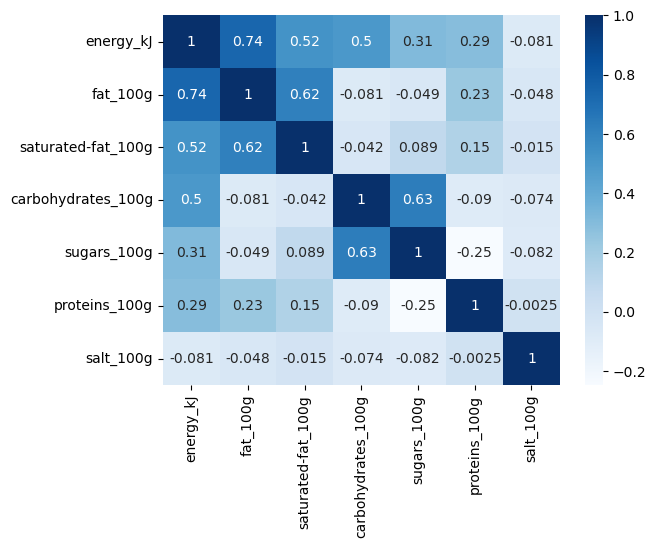

In [11]:
sb.heatmap(Selectdatafood.corr(), cmap='Blues',annot=True)

## 3 - Analyses multivariées (Analyse en Composantes Principales)

### A) Paramétrage de l'Analyse en Composantes Principales

In [12]:
colss = ['energy_kJ','fat_100g','carbohydrates_100g','proteins_100g','salt_100g']
features = ['energy_kJ','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']

In [13]:
#Centrer-réduire les valeurs
X=Selectdatafood[features]
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [14]:
X.shape

(251282, 7)

In [15]:
idx = ["mean", "std"]

pd.DataFrame(X).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
# On paramètre ici pour ne garder que 7 composantes
pca = PCA(n_components=7)
#Modèle d'ACP
pca.fit(X)

PCA(n_components=7)

### B) Pourcentage d’information (d’inertie) expliqué par chaque composante

In [17]:
#Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
print('\nValeurs de variance de chacune des composantes:')
print(pca.singular_values_,'\n') # Valeurs de variance
print('Pourcentages de la variance de chacune des composantes:')
print(pca.explained_variance_ratio_,'\n') #  Pourcentages


Valeurs de variance de chacune des composantes:
[785.75944752 674.66407167 497.53599469 476.6214652  345.796425
 278.46171991 120.65776784] 

Pourcentages de la variance de chacune des composantes:
[0.35101025 0.25877108 0.14073094 0.12914803 0.06798007 0.04408304
 0.00827658] 



In [18]:
#Résultats de l'ACP
data_sortie= pca.fit_transform(X)

In [19]:
# Bruit estimé lié à la covariance
print(pca.noise_variance_)

0.0


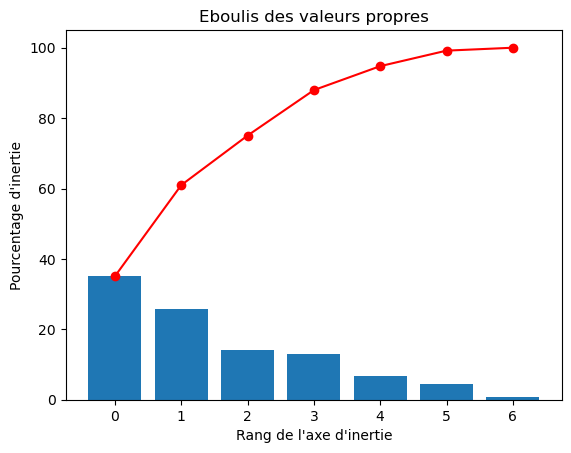

In [20]:
y = list(pca.explained_variance_ratio_*100)
x = range(len(y))
ycum = np.cumsum(y)
plt.bar(x,y)
plt.plot(x,ycum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

### C) Calcul des corrélations entre chaque variable et des composantes.

In [21]:
#Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. 
#Les composantes sont triées par variance expliquée.
pcs = pca.components_
pcs= pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.603487,0.515187,0.462386,0.250134,0.219090,0.198938,-0.080259
1,-0.061773,0.301753,0.218807,-0.598574,-0.603178,0.354103,0.098737
2,0.028953,0.019796,0.102729,0.047444,0.080889,-0.130843,0.980970
3,0.141469,-0.219494,-0.394001,0.313808,-0.081703,0.807226,0.140743
4,-0.323282,-0.405680,0.604001,-0.187835,0.445038,0.363519,-0.024650
5,0.030190,-0.377522,0.453642,0.503556,-0.613913,-0.138663,-0.033006
6,-0.711135,0.536525,0.043867,0.435391,-0.003017,0.122180,0.001056


In [22]:
pcs.columns = features
pcs.index = [f"PC{i}" for i in x]
pcs.round(2)

,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
PC0,0.60,0.52,0.46,0.25,0.22,0.20,-0.08
PC1,-0.06,0.30,0.22,-0.60,-0.60,0.35,0.10
PC2,0.03,0.02,0.10,0.05,0.08,-0.13,0.98
PC3,0.14,-0.22,-0.39,0.31,-0.08,0.81,0.14
PC4,-0.32,-0.41,0.60,-0.19,0.45,0.36,-0.02
PC5,0.03,-0.38,0.45,0.50,-0.61,-0.14,-0.03
PC6,-0.71,0.54,0.04,0.44,-0.00,0.12,0.00


In [23]:
pcs.T

,PC0,PC1,PC2,PC3,PC4,PC5,PC6
energy_kJ,0.603487,-0.061773,0.028953,0.141469,-0.323282,0.030190,-0.711135
fat_100g,0.515187,0.301753,0.019796,-0.219494,-0.405680,-0.377522,0.536525
saturated-fat_100g,0.462386,0.218807,0.102729,-0.394001,0.604001,0.453642,0.043867
carbohydrates_100g,0.250134,-0.598574,0.047444,0.313808,-0.187835,0.503556,0.435391
sugars_100g,0.219090,-0.603178,0.080889,-0.081703,0.445038,-0.613913,-0.003017
proteins_100g,0.198938,0.354103,-0.130843,0.807226,0.363519,-0.138663,0.122180
salt_100g,-0.080259,0.098737,0.980970,0.140743,-0.024650,-0.033006,0.001056


<Axes: >

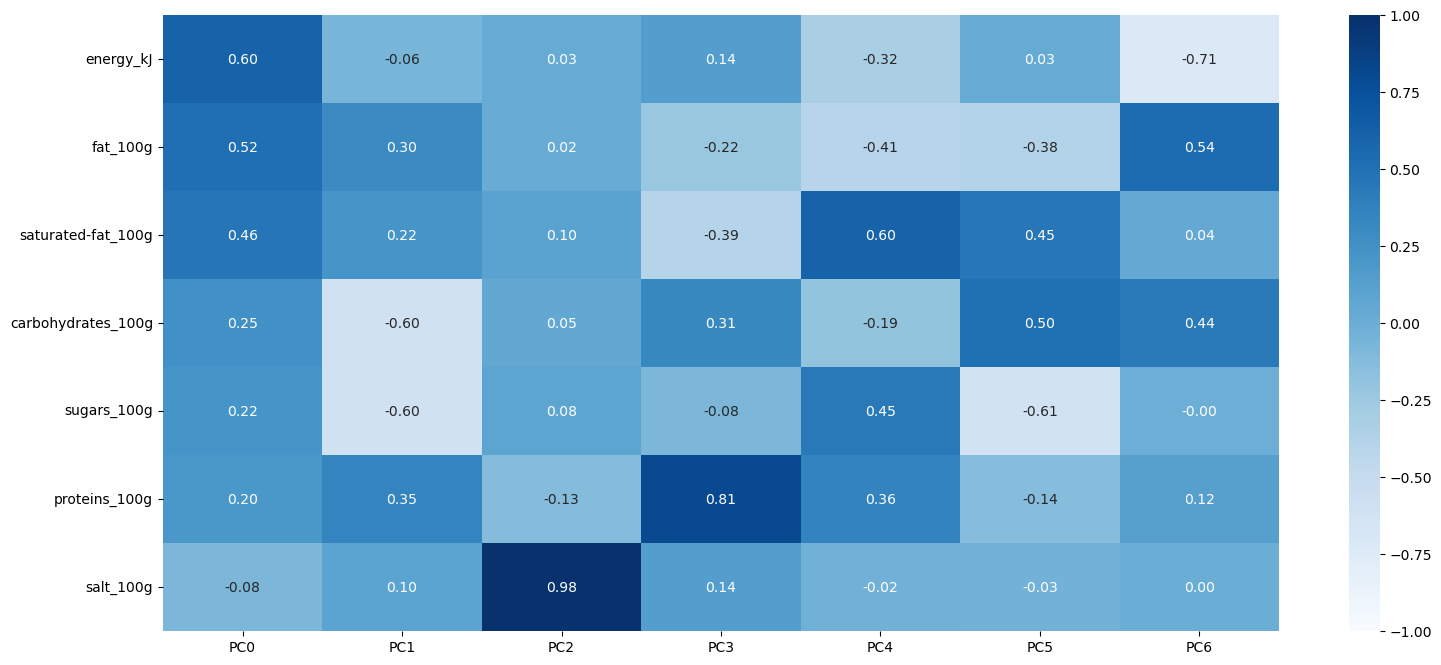

In [24]:
fig, ax = plt.subplots(figsize=(18, 8))
sb.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, fmt="0.2f",cmap='Blues')

### D) Analyse du cercle de corrélation du plan 1 et 2

In [25]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour PC1, PC2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

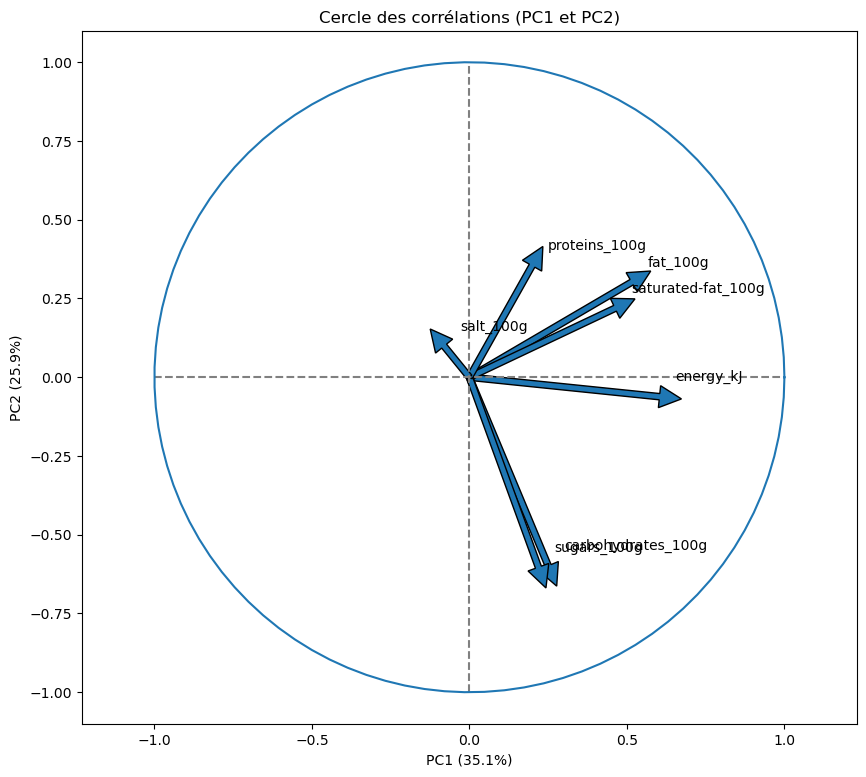

In [26]:
correlation_graph(pca, (0,1), features)

### E) Projection et analyse du nuage des variables

In [27]:
X_proj = pca.transform(X)
X_proj[:5]

array([[ 3.08051138,  0.0820715 ,  0.25394103, -1.31631413,  0.69797383,
         1.80622702,  0.10744555],
       [ 1.04734451, -0.34255653, -0.29541066,  1.70427189, -0.54867018,
        -0.16360732,  0.02111269],
       [ 2.52629272,  1.83360259, -0.18582435,  0.59125526, -1.33669098,
        -1.04716457,  0.11878143],
       [ 0.35645034, -0.86705375, -0.2291449 ,  0.86941157, -0.3550851 ,
         1.33605956, -0.01109473],
       [ 1.03325208, -0.35205666, -0.3184471 ,  1.19623006, -0.74659839,
         0.26412448,  0.03042965]])

In [28]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour PC1, PC2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sb.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()


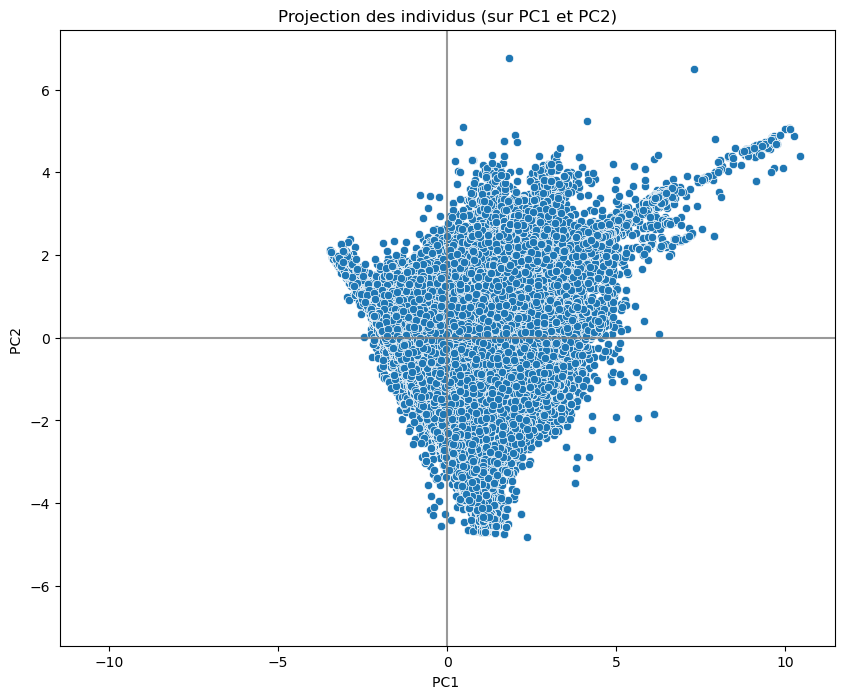

In [29]:
x_y = [0,1]
display_factorial_planes(X_proj, [0,1])

# V. Conclusion